## 1. 데이터불러오기

In [3]:
import mysql.connector
import pandas as pd
from db_info import user,password,host,database,port

db_connection = mysql.connector.connect(
    host = host,
    user = user,
    password = password,
    database = database,
    port = port
)

cursor = db_connection.cursor()

cursor.execute("SELECT * FROM fraud_list")

result = cursor.fetchall()

df = pd.DataFrame(result, columns = [i[0] for i in cursor.description])

df.head()

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,판례상세링크
0,241201,아동·청소년의성보호에관한법률위반(음란물제작·배포등)·성폭력범죄의처벌등에관한특례법위반...,2021도1181,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
1,241251,특정경제범죄가중처벌등에관한법률위반(사기)[국민참여재판으로 진행된 제1심에서 배심원 ...,2020도7802,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
2,241189,보험사기방지특별법위반,2023노878,2024.07.04,제주지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
3,240943,사기미수·도시및주거환경정비법위반[소송비용액확정결정신청의 소송비용액계산서에 실제 지출...,2021도2340,2024.06.27,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
4,241423,사기·마약류관리에관한법률위반(향정)·주민등록법위반,2023고단2401,2024.05.08,서울북부지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...


In [4]:
cursor.execute("SELECT * FROM fraud_content")

result = cursor.fetchall()

df2 = pd.DataFrame(result, columns = [i[0] for i in cursor.description])

df2.drop('사건번호',axis=1, inplace=True)
df2.head()

,판례정보일련번호,선고,판결유형,판시사항,판결요지,참조조문,참조판례,판례내용
0,241201,선고,판결,"범죄수사를 위해 정보저장매체의 압수가 필요하고, 정보저장매체를 소지하던 사람이 그...",형사소송법 제215조 제1항은 ‘범죄수사에 필요한 때에는 피의자가 죄를 범하였다고 ...,"형사소송법 제106조 제1항, 제3항, 제4항, 제121조, 제215조, 제218조...","대법원 2022. 1. 27. 선고 2021도11170 판결(공2022상, 486)...",【피 고 인】 피고인<br/>【상 고 인】 검사<br/>【변 호 인】 법무법인 비엘...
1,241251,선고,판결,"배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","형사소송법 제266조의5, 제266조의6, 제266조의7, 제266조의8, 제266...","대법원 2005. 3. 11. 선고 2004도8313 판결, 대법원 2010. 3....",【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인(유...
2,241189,선고,판결 : 상고,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,"보험사기방지 특별법 제2조 제1호, 제8조 제1항 제1호, 구 도로교통법(2020....",None,【피 고 인】 피고인<br/>【항 소 인】 피고인<br/>【검 사】 윤인식 외...
3,240943,선고,판결,허위 내용으로 법원을 기망하여 자기에게 유리한 소송비용액확정결정을 받는 행위가 ...,소송비용부담의 재판은 소송비용상환의무의 존재를 확정하고 그 지급을 명하는 데 그...,"형법 제347조, 민사소송법 제110조 제1항, 제2항<br/>","대법원 2006. 10. 12. 선고 2004재다818 판결(공2006하, 1875...",【피 고 인】 피고인 1 외 1인<br/>【상 고 인】 피고인들<br/>【변 호 인...
4,241423,선고,판결 : 항소,"피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","마약류 관리에 관한 법률 제3조 제12호 (나)목, 제4조 제1항 제1호, 제62조...",None,【피 고 인】 피고인<br/>【검 사】 박동준 외 2인<br/>【변 호 인】 ...


In [5]:
fraud_df = pd.concat([df,df2], axis=1)
fraud_df.head()

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,판례상세링크,판례정보일련번호,선고,판결유형,판시사항,판결요지,참조조문,참조판례,판례내용
0,241201,아동·청소년의성보호에관한법률위반(음란물제작·배포등)·성폭력범죄의처벌등에관한특례법위반...,2021도1181,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241201,선고,판결,"범죄수사를 위해 정보저장매체의 압수가 필요하고, 정보저장매체를 소지하던 사람이 그...",형사소송법 제215조 제1항은 ‘범죄수사에 필요한 때에는 피의자가 죄를 범하였다고 ...,"형사소송법 제106조 제1항, 제3항, 제4항, 제121조, 제215조, 제218조...","대법원 2022. 1. 27. 선고 2021도11170 판결(공2022상, 486)...",【피 고 인】 피고인<br/>【상 고 인】 검사<br/>【변 호 인】 법무법인 비엘...
1,241251,특정경제범죄가중처벌등에관한법률위반(사기)[국민참여재판으로 진행된 제1심에서 배심원 ...,2020도7802,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241251,선고,판결,"배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","형사소송법 제266조의5, 제266조의6, 제266조의7, 제266조의8, 제266...","대법원 2005. 3. 11. 선고 2004도8313 판결, 대법원 2010. 3....",【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인(유...
2,241189,보험사기방지특별법위반,2023노878,2024.07.04,제주지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241189,선고,판결 : 상고,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,"보험사기방지 특별법 제2조 제1호, 제8조 제1항 제1호, 구 도로교통법(2020....",None,【피 고 인】 피고인<br/>【항 소 인】 피고인<br/>【검 사】 윤인식 외...
3,240943,사기미수·도시및주거환경정비법위반[소송비용액확정결정신청의 소송비용액계산서에 실제 지출...,2021도2340,2024.06.27,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,240943,선고,판결,허위 내용으로 법원을 기망하여 자기에게 유리한 소송비용액확정결정을 받는 행위가 ...,소송비용부담의 재판은 소송비용상환의무의 존재를 확정하고 그 지급을 명하는 데 그...,"형법 제347조, 민사소송법 제110조 제1항, 제2항<br/>","대법원 2006. 10. 12. 선고 2004재다818 판결(공2006하, 1875...",【피 고 인】 피고인 1 외 1인<br/>【상 고 인】 피고인들<br/>【변 호 인...
4,241423,사기·마약류관리에관한법률위반(향정)·주민등록법위반,2023고단2401,2024.05.08,서울북부지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241423,선고,판결 : 항소,"피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","마약류 관리에 관한 법률 제3조 제12호 (나)목, 제4조 제1항 제1호, 제62조...",None,【피 고 인】 피고인<br/>【검 사】 박동준 외 2인<br/>【변 호 인】 ...


## 2. 전처리하기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [7]:
# 한글 깨짐 방지
plt.rcParams['font.family'] = "AppleGothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [9]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판례일련번호    4182 non-null   int64 
 1   사건명       4180 non-null   object
 2   사건번호      4182 non-null   object
 3   선고일자      4182 non-null   object
 4   법원명       4182 non-null   object
 5   사건종류명     4182 non-null   object
 6   판례상세링크    4182 non-null   object
 7   판례정보일련번호  4182 non-null   int64 
 8   선고        4182 non-null   object
 9   판결유형      4182 non-null   object
 10  판시사항      3030 non-null   object
 11  판결요지      2485 non-null   object
 12  참조조문      3001 non-null   object
 13  참조판례      1808 non-null   object
 14  판례내용      4182 non-null   object
dtypes: int64(2), object(13)
memory usage: 490.2+ KB


In [10]:
# 1. 데이터프레임 전처리 함수(태그 및 공백)
def preprocess_content(content):
    if pd.isna(content):    # NaN 값에 대한 예외 처리
        return content
    
    #content가 문자열인지 확인
    if isinstance(content, str):
        content = content.replace('<br/>', '')    # 태그제거
        content = content.replace('\n', '')    # 줄바꿈 문자 제거
        content = content.replace('\r', '')    # 캐리지 리턴 문자 제거
    return content

# 2. 데이터프레임 전처리 함수(숫자, 특수문자)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)    # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)    # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')  # 추가적인 불필요한 문자를 공백으로 대체
    return text

# 3. 데이터프레임의 여러 열에 전처릴르 적용할 경우
columns_to_preprocess = ['판시사항','판결요지','판례내용']

# 각 열에 개별적으로 전처리 함수 적용
for col in columns_to_preprocess:
    if col in fraud_df.columns:
        fraud_df[col] = fraud_df[col].apply(preprocess_content)

# 4. 전처리 후 결과 확인 (상위 5개 출력)
print(fraud_df.head())

# 5. 문서 리스트에 숫자 및 특수 문자 제거 적용 (TF-IDF를 위한 전처리)
documents = fraud_df['판례내용'].tolist()
documents = [preprocess_text(doc) for doc in documents]

# 전처리된 문서 리스트 확인 (상위 5개 출력)
print(documents[:5])

   판례일련번호                                                사건명        사건번호  \
0  241201  아동·청소년의성보호에관한법률위반(음란물제작·배포등)·성폭력범죄의처벌등에관한특례법위반...   2021도1181   
1  241251  특정경제범죄가중처벌등에관한법률위반(사기)[국민참여재판으로 진행된 제1심에서 배심원 ...   2020도7802   
2  241189                                        보험사기방지특별법위반    2023노878   
3  240943  사기미수·도시및주거환경정비법위반[소송비용액확정결정신청의 소송비용액계산서에 실제 지출...   2021도2340   
4  241423                        사기·마약류관리에관한법률위반(향정)·주민등록법위반  2023고단2401   

         선고일자       법원명 사건종류명  \
0  2024.07.25       대법원    형사   
1  2024.07.25       대법원    형사   
2  2024.07.04    제주지방법원    형사   
3  2024.06.27       대법원    형사   
4  2024.05.08  서울북부지방법원    형사   

                                              판례상세링크  판례정보일련번호  선고     판결유형  \
0  /DRF/lawService.do?OC=wanja1996&target=prec&ID...    241201  선고       판결   
1  /DRF/lawService.do?OC=wanja1996&target=prec&ID...    241251  선고       판결   
2  /DRF/lawService.do?OC=wanja1996&target=prec&ID...    241189  선고  판결 : 상고   
3  /DRF/lawService.do?OC=wan

In [11]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판례일련번호    4182 non-null   int64 
 1   사건명       4180 non-null   object
 2   사건번호      4182 non-null   object
 3   선고일자      4182 non-null   object
 4   법원명       4182 non-null   object
 5   사건종류명     4182 non-null   object
 6   판례상세링크    4182 non-null   object
 7   판례정보일련번호  4182 non-null   int64 
 8   선고        4182 non-null   object
 9   판결유형      4182 non-null   object
 10  판시사항      3030 non-null   object
 11  판결요지      2485 non-null   object
 12  참조조문      3001 non-null   object
 13  참조판례      1808 non-null   object
 14  판례내용      4182 non-null   object
dtypes: int64(2), object(13)
memory usage: 490.2+ KB


### 판례본문 내용분리

In [12]:
# 판례본문 내용 분리 - 이유 기준 분리

# '【이' 앞부분과 '【이'를 포함한 뒷부분으로 나누는 코드
fraud_df['판례내용_상단'] = fraud_df['판례내용'].str.split('【이').str[0]
fraud_df['판례내용_이유'] = fraud_df['판례내용'].str.extract(r'(【이.*)')

# 결과 출력
fraud_df.head()

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,판례상세링크,판례정보일련번호,선고,판결유형,판시사항,판결요지,참조조문,참조판례,판례내용,판례내용_상단,판례내용_이유
0,241201,아동·청소년의성보호에관한법률위반(음란물제작·배포등)·성폭력범죄의처벌등에관한특례법위반...,2021도1181,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241201,선고,판결,"범죄수사를 위해 정보저장매체의 압수가 필요하고, 정보저장매체를 소지하던 사람이 그...",형사소송법 제215조 제1항은 ‘범죄수사에 필요한 때에는 피의자가 죄를 범하였다고 ...,"형사소송법 제106조 제1항, 제3항, 제4항, 제121조, 제215조, 제218조...","대법원 2022. 1. 27. 선고 2021도11170 판결(공2022상, 486)...",【피 고 인】 피고인【상 고 인】 검사【변 호 인】 법무법인 비엘에스 담당변호사 장...,【피 고 인】 피고인【상 고 인】 검사【변 호 인】 법무법인 비엘에스 담당변호사 장...,"【이 유】 상고이유를 판단한다. 1. 원심 판시 범죄일람표 제1 내지 5,..."
1,241251,특정경제범죄가중처벌등에관한법률위반(사기)[국민참여재판으로 진행된 제1심에서 배심원 ...,2020도7802,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241251,선고,판결,"배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","형사소송법 제266조의5, 제266조의6, 제266조의7, 제266조의8, 제266...","대법원 2005. 3. 11. 선고 2004도8313 판결, 대법원 2010. 3....",【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인(유한) 바른 담당변호...,【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인(유한) 바른 담당변호...,【이 유】 상고이유를 판단한다. 1. 공소사실의 요지 및 원심의 판단 가...
2,241189,보험사기방지특별법위반,2023노878,2024.07.04,제주지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241189,선고,판결 : 상고,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,"보험사기방지 특별법 제2조 제1호, 제8조 제1항 제1호, 구 도로교통법(2020....",None,【피 고 인】 피고인【항 소 인】 피고인【검 사】 윤인식 외 1인【변 호 인】...,【피 고 인】 피고인【항 소 인】 피고인【검 사】 윤인식 외 1인【변 호 인】...,【이 유】 1. 항소이유의 요지: 사실오인 및 법리오해 이 사건은 보험약관...
3,240943,사기미수·도시및주거환경정비법위반[소송비용액확정결정신청의 소송비용액계산서에 실제 지출...,2021도2340,2024.06.27,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,240943,선고,판결,허위 내용으로 법원을 기망하여 자기에게 유리한 소송비용액확정결정을 받는 행위가 ...,소송비용부담의 재판은 소송비용상환의무의 존재를 확정하고 그 지급을 명하는 데 그...,"형법 제347조, 민사소송법 제110조 제1항, 제2항<br/>","대법원 2006. 10. 12. 선고 2004재다818 판결(공2006하, 1875...",【피 고 인】 피고인 1 외 1인【상 고 인】 피고인들【변 호 인】 변호사 이형주 ...,【피 고 인】 피고인 1 외 1인【상 고 인】 피고인들【변 호 인】 변호사 이형주 ...,【이 유】 상고이유를 판단한다. 1. 피고인 1에 대한 부분 가. 공소사...
4,241423,사기·마약류관리에관한법률위반(향정)·주민등록법위반,2023고단2401,2024.05.08,서울북부지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241423,선고,판결 : 항소,"피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","마약류 관리에 관한 법률 제3조 제12호 (나)목, 제4조 제1항 제1호, 제62조...",None,【피 고 인】 피고인【검 사】 박동준 외 2인【변 호 인】 법무법인 북부 담당...,【피 고 인】 피고인【검 사】 박동준 외 2인【변 호 인】 법무법인 북부 담당...,【이 유】【범죄사실】 1. 마약류 관리에 관한 법률 위반(향정) 누구든지 ...


### 판례내용_이유 전처리

In [13]:
# 데이터프레임에서 진행 후 데이터프레임에 리턴
import re
import pandas as pd

# 새로운 리스트를 생성하여 전처리된 데이터를 저장
service_reason = []

# 데이터프레임의 '판례내용_이유' 열을 순회
for idx in range(len(fraud_df)):
    content = fraud_df['판례내용_이유'].iloc[idx]  # 데이터프레임에서 판례 내용 가져오기
    
    # 문자열인지 확인 (문자열이 아니면 건너뜀)
    if isinstance(content, str):
        # 대괄호로 구분된 내용을 분리
        content_parts = re.split(r'【(.*?)】', content)
        reason_dict = {}

        # 각 부분을 검사
        for j in range(len(content_parts)):
            # '이유' 부분을 찾고 후속 내용을 정리
            if content_parts[j].replace(' ', '') == '이유':
                cleaned_content = content_parts[j + 1]
                cleaned_content = cleaned_content.replace('<br/>', '').replace('\r', '').replace('\n', '')
                cleaned_content = cleaned_content.replace('【', '').replace('】', '').strip()
                cleaned_content = re.sub(r'\s+', ' ', cleaned_content)  # 여러 공백을 하나로

                # 결과를 딕셔너리에 저장
                reason_dict[content_parts[j].replace(' ', '')] = cleaned_content
        
        # 전처리된 내용을 리스트에 추가
        service_reason.append(reason_dict)
    else:
        # 비문자열 데이터 처리 (빈 딕셔너리 추가)
        service_reason.append({})

# 결과를 '판례내용_이유(전처리)' 열에 저장
fraud_df['판례내용_이유(전처리)'] = service_reason

In [14]:
fraud_df['판례내용_이유(전처리)']

0       {'이유': '상고이유를 판단한다. 1. 원심 판시 범죄일람표 제1 내지 5, 7,...
1       {'이유': '상고이유를 판단한다. 1. 공소사실의 요지 및 원심의 판단 가. 공소...
2       {'이유': '1. 항소이유의 요지: 사실오인 및 법리오해 이 사건은 보험약관에서 ...
3       {'이유': '상고이유를 판단한다. 1. 피고인 1에 대한 부분 가. 공소사실의 요...
4                                              {'이유': ''}
                              ...                        
4177    {'이유': '원고 상고이유 제1점은 본 사건을 개론하오면 피고는 기생모 진순덕 급...
4178    {'이유': '피고 소송대리인 상고이유는 본건은 원고가 본건 매매계약의 존속을 전제...
4179    {'이유': '피고인 1, 피고인 2, 피고인 3에 대한 검사 김홍수의 상고취의는 ...
4180    {'이유': '서울고등검찰청 검사장 대리검사 장천수의 상고취의는 피고인 1은 제동업...
4181    {'이유': '당사자간 성립에 다툼이 없는 갑 제1호증의1의 기재에 원심증인 소외 ...
Name: 판례내용_이유(전처리), Length: 4182, dtype: object

## 전처리한 데이터 저장

In [15]:
print(fraud_df.info())
fraud_df.to_csv('data/df_fraud_real.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판례일련번호        4182 non-null   int64 
 1   사건명           4180 non-null   object
 2   사건번호          4182 non-null   object
 3   선고일자          4182 non-null   object
 4   법원명           4182 non-null   object
 5   사건종류명         4182 non-null   object
 6   판례상세링크        4182 non-null   object
 7   판례정보일련번호      4182 non-null   int64 
 8   선고            4182 non-null   object
 9   판결유형          4182 non-null   object
 10  판시사항          3030 non-null   object
 11  판결요지          2485 non-null   object
 12  참조조문          3001 non-null   object
 13  참조판례          1808 non-null   object
 14  판례내용          4182 non-null   object
 15  판례내용_상단       4182 non-null   object
 16  판례내용_이유       4178 non-null   object
 17  판례내용_이유(전처리)  4182 non-null   object
dtypes: int64(2), object(16)
memory usage: 588.2+ KB


In [36]:
### df_fraud_real(이유 전처리한 데이터 불러오기)
import pandas as pd

fraud_df = pd.read_csv('data/df_fraud_real.csv')
fraud_df.head()

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,판례상세링크,판례정보일련번호,선고,판결유형,판시사항,판결요지,참조조문,참조판례,판례내용,판례내용_상단,판례내용_이유,판례내용_이유(전처리)
0,241201,아동·청소년의성보호에관한법률위반(음란물제작·배포등)·성폭력범죄의처벌등에관한특례법위반...,2021도1181,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241201,선고,판결,"범죄수사를 위해 정보저장매체의 압수가 필요하고, 정보저장매체를 소지하던 사람이 그...",형사소송법 제215조 제1항은 ‘범죄수사에 필요한 때에는 피의자가 죄를 범하였다고 ...,"형사소송법 제106조 제1항, 제3항, 제4항, 제121조, 제215조, 제218조...","대법원 2022. 1. 27. 선고 2021도11170 판결(공2022상, 486)...",【피 고 인】 피고인【상 고 인】 검사【변 호 인】 법무법인 비엘에스 담당변호사 장...,【피 고 인】 피고인【상 고 인】 검사【변 호 인】 법무법인 비엘에스 담당변호사 장...,"【이 유】 상고이유를 판단한다. 1. 원심 판시 범죄일람표 제1 내지 5,...","{'이유': '상고이유를 판단한다. 1. 원심 판시 범죄일람표 제1 내지 5, 7,..."
1,241251,특정경제범죄가중처벌등에관한법률위반(사기)[국민참여재판으로 진행된 제1심에서 배심원 ...,2020도7802,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241251,선고,판결,"배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","형사소송법 제266조의5, 제266조의6, 제266조의7, 제266조의8, 제266...","대법원 2005. 3. 11. 선고 2004도8313 판결, 대법원 2010. 3....",【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인(유한) 바른 담당변호...,【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인(유한) 바른 담당변호...,【이 유】 상고이유를 판단한다. 1. 공소사실의 요지 및 원심의 판단 가...,{'이유': '상고이유를 판단한다. 1. 공소사실의 요지 및 원심의 판단 가. 공소...
2,241189,보험사기방지특별법위반,2023노878,2024.07.04,제주지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241189,선고,판결 : 상고,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,"보험사기방지 특별법 제2조 제1호, 제8조 제1항 제1호, 구 도로교통법(2020....",NaN,【피 고 인】 피고인【항 소 인】 피고인【검 사】 윤인식 외 1인【변 호 인】...,【피 고 인】 피고인【항 소 인】 피고인【검 사】 윤인식 외 1인【변 호 인】...,【이 유】 1. 항소이유의 요지: 사실오인 및 법리오해 이 사건은 보험약관...,{'이유': '1. 항소이유의 요지: 사실오인 및 법리오해 이 사건은 보험약관에서 ...
3,240943,사기미수·도시및주거환경정비법위반[소송비용액확정결정신청의 소송비용액계산서에 실제 지출...,2021도2340,2024.06.27,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,240943,선고,판결,허위 내용으로 법원을 기망하여 자기에게 유리한 소송비용액확정결정을 받는 행위가 ...,소송비용부담의 재판은 소송비용상환의무의 존재를 확정하고 그 지급을 명하는 데 그...,"형법 제347조, 민사소송법 제110조 제1항, 제2항<br/>","대법원 2006. 10. 12. 선고 2004재다818 판결(공2006하, 1875...",【피 고 인】 피고인 1 외 1인【상 고 인】 피고인들【변 호 인】 변호사 이형주 ...,【피 고 인】 피고인 1 외 1인【상 고 인】 피고인들【변 호 인】 변호사 이형주 ...,【이 유】 상고이유를 판단한다. 1. 피고인 1에 대한 부분 가. 공소사...,{'이유': '상고이유를 판단한다. 1. 피고인 1에 대한 부분 가. 공소사실의 요...
4,241423,사기·마약류관리에관한법률위반(향정)·주민등록법위반,2023고단2401,2024.05.08,서울북부지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241423,선고,판결 : 항소,"피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","마약류 관리에 관한 법률 제3조 제12호 (나)목, 제4조 제1항 제1호, 제62조...",NaN,【피 고 인】 피고인【검 사】 박동준 외 2인【변 호 인】 법무법인 북부 담당...,【피 고 인】 피고인【검 사】 박동준 외 2인【변 호 인】 법무법인 북부 담당...,【이 유】【범죄사실】 1. 마약류 관리에 관한 법률 위반(향정) 누구든지 ...,{'이유': ''}


## 빈도수 계산

In [26]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
okt = Okt()

nouns = []
for doc in fraud_df['판례내용'] :
    nouns.extend(okt.nouns(doc))

word_freq = Counter(nouns)
most_common_words = word_freq.most_common(50)
print(most_common_words)

[('피고인', 194753), ('소외', 187002), ('제', 140595), ('이', 134349), ('위', 123355), ('것', 103893), ('등', 91663), ('그', 80016), ('사건', 76891), ('사실', 72470), ('수', 58622), ('및', 56877), ('의', 55701), ('대한', 53317), ('원고', 52703), ('회사', 51321), ('관', 51111), ('피고', 49919), ('각', 48889), ('판결', 48575), ('점', 44527), ('원심', 44395), ('인정', 39370), ('원', 38899), ('이유', 37679), ('항', 32531), ('부분', 31381), ('주식회사', 31369), ('판단', 30488), ('대하', 29842), ('행위', 29628), ('기재', 29381), ('경', 28805), ('경우', 27866), ('계약', 27678), ('중', 26955), ('주장', 26834), ('피해자', 26649), ('지급', 25131), ('은', 24605), ('진술', 24587), ('증거', 24006), ('범죄', 23655), ('선고', 22576), ('관련', 22415), ('금', 21452), ('사업', 20298), ('내용', 20193), ('해당', 19792), ('위반', 18083)]


In [29]:
most_common_words_list = [
    ('피고인', 194753), ('소외', 187002), ('제', 140595), ('이', 134349), ('위', 123355), 
    ('것', 103893), ('등', 91663), ('그', 80016), ('사건', 76891), ('사실', 72470), 
    ('수', 58622), ('및', 56877), ('의', 55701), ('대한', 53317), ('원고', 52703), 
    ('회사', 51321), ('관', 51111), ('피고', 49919), ('각', 48889), ('판결', 48575), 
    ('점', 44527), ('원심', 44395), ('인정', 39370), ('원', 38899), ('이유', 37679), 
    ('항', 32531), ('부분', 31381), ('주식회사', 31369), ('판단', 30488), ('대하', 29842), 
    ('행위', 29628), ('기재', 29381), ('경', 28805), ('경우', 27866), ('계약', 27678), 
    ('중', 26955), ('주장', 26834), ('피해자', 26649), ('지급', 25131), ('은', 24605), 
    ('진술', 24587), ('증거', 24006), ('범죄', 23655), ('선고', 22576), ('관련', 22415), 
    ('금', 21452), ('사업', 20298), ('내용', 20193), ('해당', 19792), ('위반', 18083)
]

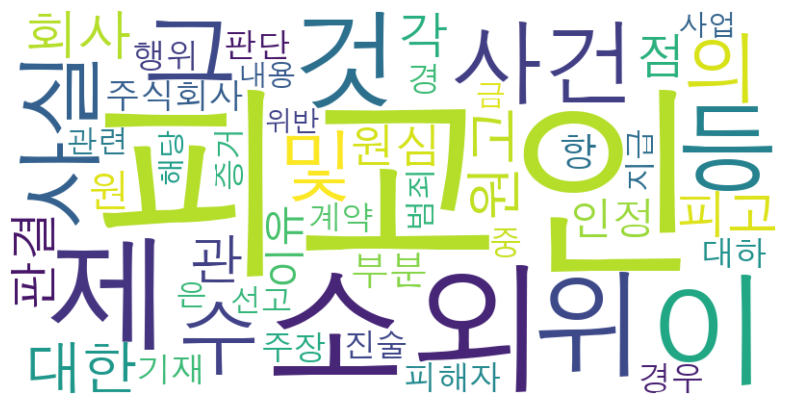

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 상위 50개의 단어를 사용한 워드 클라우드 생성
wordcloud = WordCloud(font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf',  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words_list))

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

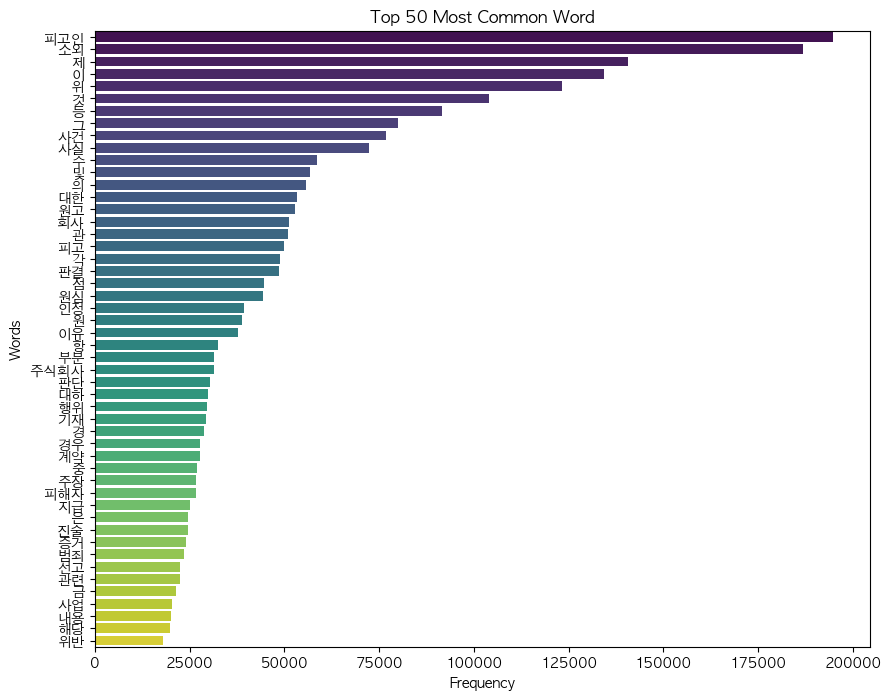

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

words, counts = zip(*most_common_words)

plt.figure(figsize=(10,8))
sns.barplot(x=counts, y=words, palette='viridis', hue=words, dodge=False, legend=False)
plt.title('Top 50 Most Common Word')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## 불용어 제거

In [38]:
#한국어 처리를 의한 라이브러리 사용 
# Counter: 데이터를 카운팅하여 빈도수를 계산하기 위한 모듈, 주로 단어 빈도 계산에 사용
from collections import Counter

# konlpy의 Okt: 한국어 형태소 분석기. 텍스트를 형태소 단위로 분리하거나 품사 태깅에 사용
from konlpy.tag import Okt

# CountVectorizer: 문서에서 단어 빈도 수를 기반으로 피처 벡터를 생성하는 사이킷런의 도구
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
import pandas as pd
import re
from konlpy.tag import Okt
# 불용어 파일로드
stopwords_path = 'data/sorted_words_20241022.txt'
# 빈도수 높은 애들 계속 추가
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금', '검사', '판결', '거나', '유1', 
                  '상고이유', '기초', '사실', '기초사실', '사고', '피고', '원고', '피고인', 
                  '사건', '담당', '변호사', '변호인', '변론', '종결', '소외','하기로', 
                  '이를', '의하여', '받은', '있는','이고', '있고', '없는', '없으므로', 
                  '살펴보면', '있어', '지는', '있다고', '에는', '라고', '인한',
                  '의하면', '하게', '하였고', '아니한', '정당하고', '에도', '으로부터', '이라고']
pattern = r'제\d+|\d호증|\d호'    # 정규 표현식 패턴

with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())
    
# 불용어 제거 함수(리스트 상태로 처리)
def remove_stopwrds(content):
    # Okt 객체를 생성하여 형태소 분석
    okt = Okt()
    
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(content)    # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens
        if len(word) > 1
        and word not in stopwords    # 숫자인 경우 제외
        and not word.isdigit()    # 숫자인 경우 제외
        and word not in stopwords_pick
        and not re.match(pattern, word)
    ]
    return ' '.join(filtered_words)    # 문자열로 반환

# 불용어 제거 수행
fraud_df['판례내용_제거(불용어)'] = fraud_df['판례내용'].apply(remove_stopwrds)

print(fraud_df['판례내용_제거(불용어)'])

0       법무 법인 비엘 에스 장승수 고법 판시 일람표 한다 한다 판시 일람표 판시와 서부 ...
1       법무 법인 유한 바른 박일환 고법 한다 한다 화물 트럭 구입 구입 돌려줄 의사 없었...
2       윤인식 법무 법인 세움 남현 제주 지법 고정 시한 오인 오해 보험 보험금 지급 제한...
3       인들 이형주 북부 지법 북부 한다 한다 북부 카합 임시 총회 개최 금지 가처분 하여...
4       박동준 법무 법인 북부 정재원 징역 1년 한다 3년 유예 한다 200시간 사회 봉사...
                              ...                        
4177    이기만 피상 학술 부산 대구 민공 본건 소송비용 부담 한다 개론 오면 생모 순덕 중...
4178    최영 최돈연 삼보 세멘트 제조 공사 김태 춘천지방법원 강릉 지원 민공 본건 소송비용...
4179    김홍수 본건 김홍수 고취 간첩 예비 언도 형법 88조 하였으나 판시 간첩 예비 형법...
4180    천수 한다 검찰청 대리 장천 수의 고취 동업 박업 자로 6.25 사변 발발한 괴뢰군...
4181    공소 공소 본건 공소 비용 부담 다툼 증언 실부 하여 명의 서기 1947.3 목록 ...
Name: 판례내용_제거(불용어), Length: 4182, dtype: object


## 청크로 TF-IDF 수행

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거 (이미 제거되었으므로 stop_words는 필요 없음)
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# 1. 데이터프레임의 '판례내용_제거(불용어)' 열 확인
print('불용어 제거 후 판례 내용:')
print(fraud_df['판례내용_제거(불용어)'].head())

# 2. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunksize = 1000
tfidf_result = []   # 청크 처리 결과를 저장할 리스트


# 3. 데이터를 청크로 나누어 처리
for i in range(0, len(fraud_df), chunksize):
    # 현재 청크데이터 추출
    doc_chunk = fraud_df['판례내용_제거(불용어)'][i:i + chunksize]
    
    # TF-IDF 적용
    tfidf_array = vectorizer.fit_transform(doc_chunk)
    
    # TF-IDF 적용한 결과 데이터프레임으로 변환하여 리스트에 저장
    tfidf_result.append(pd.DataFrame(tfidf_array.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 처리완료 메시지
    print(f"{min(i + chunksize, len(fraud_df))}개 문서 처리")

# 4. 모든 청크 하나의 데이터프레임으로 합치기
tfidf_df = pd.concat(tfidf_result, ignore_index=True)

# 5. 최종결과 확인
print("최종 결과:")
print(tfidf_df.head())

print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df.shape}")


불용어 제거 후 판례 내용:
0    법무 법인 비엘 에스 장승수 고법 판시 일람표 한다 한다 판시 일람표 판시와 서부 ...
1    법무 법인 유한 바른 박일환 고법 한다 한다 화물 트럭 구입 구입 돌려줄 의사 없었...
2    윤인식 법무 법인 세움 남현 제주 지법 고정 시한 오인 오해 보험 보험금 지급 제한...
3    인들 이형주 북부 지법 북부 한다 한다 북부 카합 임시 총회 개최 금지 가처분 하여...
4    박동준 법무 법인 북부 정재원 징역 1년 한다 3년 유예 한다 200시간 사회 봉사...
Name: 판례내용_제거(불용어), dtype: object
1000개 문서 처리
2000개 문서 처리
3000개 문서 처리
4000개 문서 처리
4182개 문서 처리
최종 결과:
        00       000  000000  0000000  000달러  000만  000만원  000억      000원  \
0  0.00000  0.000000     0.0      0.0    0.0   0.0    0.0   0.0  0.000000   
1  0.00000  0.011002     0.0      0.0    0.0   0.0    0.0   0.0  0.009627   
2  0.00000  0.000000     0.0      0.0    0.0   0.0    0.0   0.0  0.007663   
3  0.00000  0.036765     0.0      0.0    0.0   0.0    0.0   0.0  0.032171   
4  0.01923  0.000000     0.0      0.0    0.0   0.0    0.0   0.0  0.019024   

   000유로  ...  홍완희  환문  환에  황무지  황씨  후단의  후에  후퇴  훔쳐  희는  
0    0.0  ...  NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN  
1    0.0  ...  NaN NaN NaN 

## 판례내용 분석

### 클러스터링

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# TF-IDF 벡터라이저 설정
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# 1. '판례내용_제거(불용어)' 열로 TF-IDF 벡터화
tfidf_array = vectorizer.fit_transform(fraud_df['판례내용_제거(불용어)'])

# 2. K-Means 클러스터링 설정
num_clusters = 10  # 원하는 클러스터 개수 설정
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # n_init 값을 명시적으로 설정

# 3. K-Means 모델 학습
kmeans.fit(tfidf_array)

# 4. 클러스터 레이블을 데이터프레임에 추가
fraud_df['클러스터'] = kmeans.labels_

# 5. 클러스터링 결과 확인
print("클러스터링 결과:")
print(fraud_df[['판례내용_제거(불용어)', '클러스터']].head())

클러스터링 결과:
                                        판례내용_제거(불용어)  클러스터
0  법무 법인 비엘 에스 장승수 고법 판시 일람표 한다 한다 판시 일람표 판시와 서부 ...     6
1  법무 법인 유한 바른 박일환 고법 한다 한다 화물 트럭 구입 구입 돌려줄 의사 없었...     6
2  윤인식 법무 법인 세움 남현 제주 지법 고정 시한 오인 오해 보험 보험금 지급 제한...     2
3  인들 이형주 북부 지법 북부 한다 한다 북부 카합 임시 총회 개최 금지 가처분 하여...     6
4  박동준 법무 법인 북부 정재원 징역 1년 한다 3년 유예 한다 200시간 사회 봉사...     6


### 클로스터링 수 결정

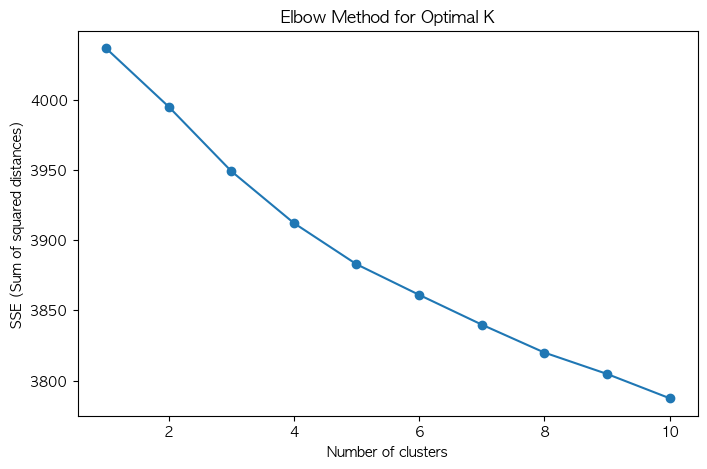

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_range = range(1,11)
sse = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_array)
    sse.append(kmeans.inertia_)
    
# 엘보우 그래프
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')
plt.show()

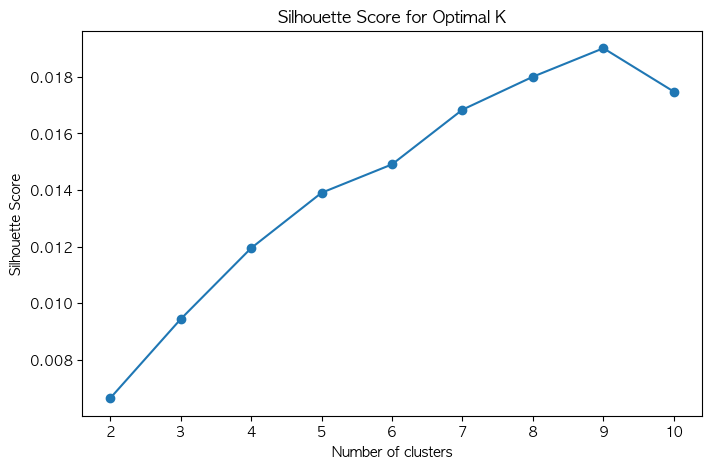

In [58]:
# 2. 실루엣(Silhouette) 점수 코드
# 실루엣 점수는 각 데이터 포인트가 얼마나 잘 속한 클러스터와 가까우며, 
# 다른 클러스터와는 얼마나 멀리 떨어져 있는지를 평가
# 값이 1에 가까울수록 클러스터링이 잘된 것

from sklearn.metrics import silhouette_score

# 클러스터 개수 범위 설정 (2부터 10까지)
silhouette_scores = []

# 각 클러스터 개수에 대해 K-Means 모델 학습 및 실루엣 점수 계산
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init 값을 명시적으로 10으로 설정
    clusters = kmeans.fit_predict(tfidf_array)
    silhouette_avg = silhouette_score(tfidf_array, clusters)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### 중심단어보기

In [59]:
# 클러스터 중심 단어 출력 및 리스트 저장
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
terms = vectorizer.get_feature_names_out()  # 단어 목록

# 클러스터 중심 단어를 저장할 딕셔너리
cluster_keywords = {}

for i in range(num_clusters):
    cluster_keywords[i] = []  # 각 클러스터에 대한 빈 리스트 생성
    print(f"\n클러스터 {i + 1}의 중심 단어:")
    for ind in order_centroids[i, :5]:  # 각 클러스터에서 상위 10개 단어
        keyword = terms[ind]
        cluster_keywords[i].append(keyword)  # 중심 단어를 리스트에 추가
        print(f" {keyword}")

# 클러스터 중심 단어 리스트 확인
print("\n클러스터 중심 단어 리스트:")
for cluster_num, keywords in cluster_keywords.items():
    print(f"클러스터 {cluster_num + 1}: {keywords}")


클러스터 1의 중심 단어:
 등기
 부동산
 소유권
 이전
 토지

클러스터 2의 중심 단어:
 분양
 계약
 대출
 000원
 채권

클러스터 3의 중심 단어:
 보험
 계약
 보험금
 손해
 회사

클러스터 4의 중심 단어:
 회사
 주식
 주식회사
 자금
 거래

클러스터 5의 중심 단어:
 포탈
 신고
 세액
 부과
 소득

클러스터 6의 중심 단어:
 위조
 형법
 산입
 판시
 일수

클러스터 7의 중심 단어:
 지급
 신청
 계좌
 사기죄
 거래

클러스터 8의 중심 단어:
 수표
 어음
 약속어음
 발행
 지급

클러스터 9의 중심 단어:
 토지
 매매
 계약
 부동산
 매도

클러스터 10의 중심 단어:
 의료
 의료법
 병원
 개설
 입원

클러스터 중심 단어 리스트:
클러스터 1: ['등기', '부동산', '소유권', '이전', '토지']
클러스터 2: ['분양', '계약', '대출', '000원', '채권']
클러스터 3: ['보험', '계약', '보험금', '손해', '회사']
클러스터 4: ['회사', '주식', '주식회사', '자금', '거래']
클러스터 5: ['포탈', '신고', '세액', '부과', '소득']
클러스터 6: ['위조', '형법', '산입', '판시', '일수']
클러스터 7: ['지급', '신청', '계좌', '사기죄', '거래']
클러스터 8: ['수표', '어음', '약속어음', '발행', '지급']
클러스터 9: ['토지', '매매', '계약', '부동산', '매도']
클러스터 10: ['의료', '의료법', '병원', '개설', '입원']


In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {kmeans.cluster_centers_[i, ind]}")


클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 등기 - TF-IDF 값: 0.20557895772998822
단어: 부동산 - TF-IDF 값: 0.14634528494719992
단어: 소유권 - TF-IDF 값: 0.12216660486239317
단어: 이전 - TF-IDF 값: 0.08236390479669908
단어: 토지 - TF-IDF 값: 0.06013815647195099
단어: 근저당권 - TF-IDF 값: 0.056473775097212485
단어: 명의 - TF-IDF 값: 0.05615071915440957
단어: 임야 - TF-IDF 값: 0.04571447719788655
단어: 설정 - TF-IDF 값: 0.044812929005432434
단어: 가등기 - TF-IDF 값: 0.04136630980547566

클러스터 2:
단어: 분양 - TF-IDF 값: 0.07449058850491194
단어: 계약 - TF-IDF 값: 0.06201405418978563
단어: 대출 - TF-IDF 값: 0.05674449917508329
단어: 000원 - TF-IDF 값: 0.05555126490582803
단어: 채권 - TF-IDF 값: 0.05446377018348468
단어: 000 - TF-IDF 값: 0.044804010544805144
단어: 공사 - TF-IDF 값: 0.0441606987393113
단어: 지급 - TF-IDF 값: 0.04361087092514451
단어: 채무 - TF-IDF 값: 0.043517258825327525
단어: 변제 - TF-IDF 값: 0.04150464817876695

클러스터 3:
단어: 보험 - TF-IDF 값: 0.584056689185053
단어: 계약 - TF-IDF 값: 0.16376213961993083
단어: 보험금 - TF-IDF 값: 0.1487749587662169
단어: 손해 - TF-IDF 값: 0.05963956853789412
단어: 

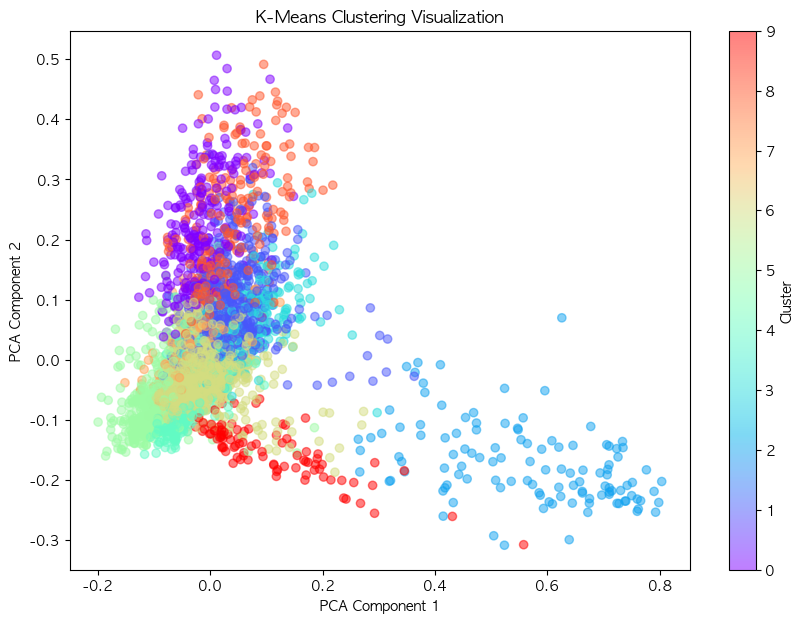

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# 9. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_array.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=fraud_df['클러스터'], cmap='rainbow', alpha=0.5)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

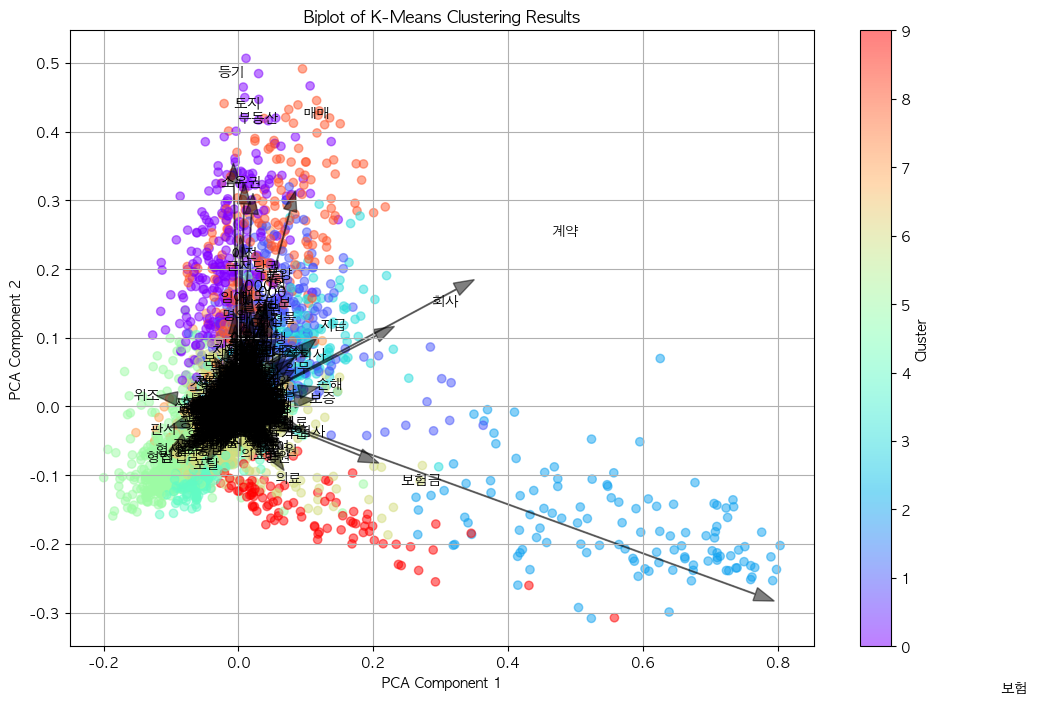

In [62]:
# 4. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_array.toarray())

# 5. Biplot 생성
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.5)

# PCA 축의 단어 벡터 추가
for i in range(len(vectorizer.get_feature_names_out())):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color='black', alpha=0.5, head_width=0.02)

    # 단어 라벨 추가
    plt.text(pca.components_[0, i] * 1.5, pca.components_[1, i] * 1.5,
             vectorizer.get_feature_names_out()[i], color='black', ha='center', va='center')

plt.title('Biplot of K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.colorbar(label='Cluster')
plt.show()

In [63]:
# 6. 클러스터 중심 계산
cluster_centers = kmeans.cluster_centers_

# 7. 각 클러스터의 중심 단어 추출
def get_top_keywords_for_clusters(cluster_centers, vectorizer, n_words=5):
    order_centroids = cluster_centers.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
    terms = vectorizer.get_feature_names_out()  # 단어 목록
    
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_keywords[i] = [terms[ind] for ind in order_centroids[i, :n_words]]  # 상위 n_words 단어
    
    return cluster_keywords

# 8. 클러스터 중심 단어 출력
cluster_keywords = get_top_keywords_for_clusters(cluster_centers, vectorizer)
for cluster_num, keywords in cluster_keywords.items():
    print(f"\n클러스터 {cluster_num + 1}의 중심 단어들: {', '.join(keywords)}")


클러스터 1의 중심 단어들: 등기, 부동산, 소유권, 이전, 토지

클러스터 2의 중심 단어들: 분양, 계약, 대출, 000원, 채권

클러스터 3의 중심 단어들: 보험, 계약, 보험금, 손해, 회사

클러스터 4의 중심 단어들: 회사, 주식, 주식회사, 자금, 거래

클러스터 5의 중심 단어들: 포탈, 신고, 세액, 부과, 소득

클러스터 6의 중심 단어들: 위조, 형법, 산입, 판시, 일수

클러스터 7의 중심 단어들: 지급, 신청, 계좌, 사기죄, 거래

클러스터 8의 중심 단어들: 수표, 어음, 약속어음, 발행, 지급

클러스터 9의 중심 단어들: 토지, 매매, 계약, 부동산, 매도

클러스터 10의 중심 단어들: 의료, 의료법, 병원, 개설, 입원


# 시각화

### 클러스터_키워드 상위 중요 단어 워드클라우드로 표시

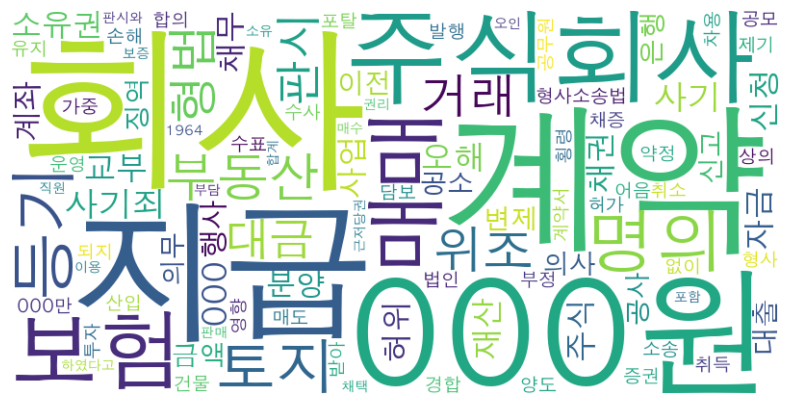

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

# TF-IDF 벡터라이저로 얻은 데이터프레임에서 상위 중요 단어 100개만 시각화
top_n = 100

# 각 단어별 평균 TF-IDF 점수를 계산
tfidf_means = tfidf_df.mean().sort_values(ascending=False)[:top_n]

# 워드클라우드 생성, 한글 폰트 적용
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800, 
    height=400, 
    background_color='white'
).generate_from_frequencies(tfidf_means)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

In [ ]:
#불용어 추가
#하기로, 이를, 의하여, 받은, 000원, 000만, 이고, 있고, 없는, 없으므로, 살펴보면,있어, 지는, 있다고, 에는, 라고, 인한
#있는, 의하면, 하게, 하였고, 아니한, 정당하고, 에도, 으로부터, 이라고

In [65]:
top_words = list(tfidf_means.index)
top_words

['회사',
 '계약',
 '지급',
 '000원',
 '주식회사',
 '보험',
 '매매',
 '명의',
 '등기',
 '토지',
 '부동산',
 '위조',
 '형법',
 '거래',
 '판시',
 '대금',
 '사기죄',
 '사기',
 '000',
 '오해',
 '사업',
 '교부',
 '자금',
 '재산',
 '채권',
 '주식',
 '신청',
 '허위',
 '채무',
 '소유권',
 '계좌',
 '분양',
 '행사',
 '대출',
 '금액',
 '이전',
 '공소',
 '의사',
 '변제',
 '은행',
 '신고',
 '의무',
 '공사',
 '징역',
 '형사소송법',
 '담보',
 '손해',
 '취득',
 '되지',
 '소송',
 '차용',
 '수표',
 '채증',
 '가중',
 '증권',
 '000만',
 '제기',
 '약정',
 '받아',
 '포탈',
 '발행',
 '부정',
 '어음',
 '합의',
 '건물',
 '취소',
 '영향',
 '산입',
 '법인',
 '매도',
 '양도',
 '유지',
 '허가',
 '형사',
 '공모',
 '경합',
 '없이',
 '계약서',
 '횡령',
 '상의',
 '운영',
 '수사',
 '투자',
 '공무원',
 '하였다고',
 '직원',
 '근저당권',
 '부담',
 '합계',
 '판매',
 '소유',
 '오인',
 '권리',
 '매수',
 '이용',
 '채택',
 '1964',
 '판시와',
 '포함',
 '보증']

In [67]:
# 리스트를 텍스트 파일로 저장
with open("data/fraud_top_words.txt", "w") as f:
    for word in top_words:
        f.write(word + "\n")

print("리스트가 top_words.txt 파일로 저장되었습니다.")

리스트가 top_words.txt 파일로 저장되었습니다.
